In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
cricket = pd.read_csv(r"C:\Users\hp\Downloads\Cricket-all-teams-all-matches.csv")

In [19]:
cricket

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format
0,India,Pakistan,drawn,NaN,Bengaluru,"Dec 8-12, 2007",Test # 1852,Test
1,India,Pakistan,drawn,NaN,Eden Gardens,"Nov 30-Dec 4, 2007",Test # 1850,Test
2,India,Pakistan,India,6 wickets,Delhi,"Nov 22-26, 2007",Test # 1849,Test
3,Pakistan,India,Pakistan,341 runs,Karachi,"Jan 29-Feb 1, 2006",Test # 1783,Test
4,Pakistan,India,drawn,NaN,Faisalabad,"Jan 21-25, 2006",Test # 1782,Test
...,...,...,...,...,...,...,...,...
7788,Australia,ICC World XI,Australia,210 runs,Sydney,"Oct 14-17, 2005",Test # 1768,Test
7789,Australia,ICC World XI,Australia,156 runs,Melbourne (Docklands),"Oct 9, 2005",ODI # 2284,ODI
7790,Australia,ICC World XI,Australia,55 runs,Melbourne (Docklands),"Oct 7, 2005",ODI # 2283,ODI
7791,Australia,ICC World XI,Australia,93 runs,Melbourne (Docklands),"Oct 5, 2005",ODI # 2282,ODI


In [20]:
cricket['Match Year'] = cricket['Match Date'].str.extract(r'(\d{4})').astype(int)

In [36]:
cricket

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format,Match Year,Match Outcome
0,India,Pakistan,drawn,NaN,Bengaluru,"Dec 8-12, 2007",Test # 1852,Test,2007,Draw
1,India,Pakistan,drawn,NaN,Eden Gardens,"Nov 30-Dec 4, 2007",Test # 1850,Test,2007,Draw
2,India,Pakistan,India,6 wickets,Delhi,"Nov 22-26, 2007",Test # 1849,Test,2007,Team 1
3,Pakistan,India,Pakistan,341 runs,Karachi,"Jan 29-Feb 1, 2006",Test # 1783,Test,2006,Team 1
4,Pakistan,India,drawn,NaN,Faisalabad,"Jan 21-25, 2006",Test # 1782,Test,2006,Draw
...,...,...,...,...,...,...,...,...,...,...
7788,Australia,ICC World XI,Australia,210 runs,Sydney,"Oct 14-17, 2005",Test # 1768,Test,2005,Team 1
7789,Australia,ICC World XI,Australia,156 runs,Melbourne (Docklands),"Oct 9, 2005",ODI # 2284,ODI,2005,Team 1
7790,Australia,ICC World XI,Australia,55 runs,Melbourne (Docklands),"Oct 7, 2005",ODI # 2283,ODI,2005,Team 1
7791,Australia,ICC World XI,Australia,93 runs,Melbourne (Docklands),"Oct 5, 2005",ODI # 2282,ODI,2005,Team 1


In [37]:
cricket.isna().sum()

Team 1              0
Team 2              0
Winner              0
Margin           1038
Ground              0
Match Date          0
Scorecard           0
Format              0
Match Year          0
Match Outcome       0
dtype: int64

In [29]:
cricket['Winner'].unique()

array(['drawn', 'India', 'Pakistan', 'no result', 'tied', 'Afghanistan',
       'Australia', 'Bangladesh', 'England', 'World-XI', 'Ireland',
       'New Zealand', 'South Africa', 'Sri Lanka', 'West Indies',
       'Zimbabwe'], dtype=object)

In [ ]:
# This shows there are no unclear values in "Winner" column
# The .isna() also shows there are no Null values in "Winner" column

In [35]:
conditions = [
    cricket['Winner'].str.lower().fillna('').str.strip().isin(['drawn', 'tied', 'no result']),
    cricket['Winner'] == cricket['Team 1'],
    cricket['Winner'] == cricket['Team 2']
]

choices = [
    'Draw',
    'Team 1',
    'Team 2'
]

cricket['Match Outcome'] = np.select(conditions, choices, default='No result')

## Predicting Code

#### KNN

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = cricket[['Team 1', 'Team 2', 'Ground', 'Format', 'Match Year']]
X = pd.get_dummies(X, drop_first=True)  # Convert categorical to numerical
y = cricket['Match Outcome']
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.5426555484284797

Classification Report:
               precision    recall  f1-score   support

        Draw       0.36      0.33      0.34       206
      Team 1       0.60      0.67      0.63       793
      Team 2       0.51      0.44      0.47       560

    accuracy                           0.54      1559
   macro avg       0.49      0.48      0.48      1559
weighted avg       0.54      0.54      0.54      1559


Confusion Matrix:
 [[ 67  96  43]
 [ 70 535 188]
 [ 51 265 244]]


## Perceptron

In [62]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)
model = Perceptron()
model.fit(X_train, y_train)
y_pred_sklearn = model.predict(X_test)

print("Perceptron Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_sklearn))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Perceptron Evaluation:
Accuracy: 0.5093008338678641

Classification Report:
               precision    recall  f1-score   support

        Draw       0.13      0.11      0.12       215
      Team 1       0.50      0.56      0.53       794
      Team 2       0.34      0.30      0.32       550

    accuracy                           0.41      1559
   macro avg       0.32      0.32      0.32      1559
weighted avg       0.39      0.41      0.40      1559



## MLP

In [68]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error

In [70]:
X = cricket[['Team 1', 'Team 2', 'Ground', 'Format', 'Match Year']]
X = pd.get_dummies(X, drop_first=True)  # Convert categorical to numerical
le = LabelEncoder()
y = cricket['Match Outcome']
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

architectures = {
    "1 layer (64)": [64],
    "2 layers (64, 32)": [64, 32],
    "3 layers (128, 64, 32)": [128, 64, 32],
    "2 layers (100, 50)": [100, 50],
    "3 layers (50, 50, 50)": [50, 50, 50]
}

mse_results = {}

# Train and evaluate each architecture
for name, layers_config in architectures.items():
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))
    
    # Add hidden layers
    for units in layers_config:
        model.add(layers.Dense(units, activation='relu'))
    
    # Output layer
    model.add(layers.Dense(1))  # Regression output
    
    # Compile
    model.compile(optimizer='adam', loss='mse')
    
    # Train
    model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, verbose=0)
    
    # Predict and evaluate
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_results[name] = mse
    print(f"{name} - MSE: {mse:.4f}")

49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1 layer (64) - MSE: 0.4777
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
2 layers (64, 32) - MSE: 0.5499
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
3 layers (128, 64, 32) - MSE: 0.5729
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2 layers (100, 50) - MSE: 0.5737
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  
3 layers (50, 50, 50) - MSE: 0.5446


## Visualizations

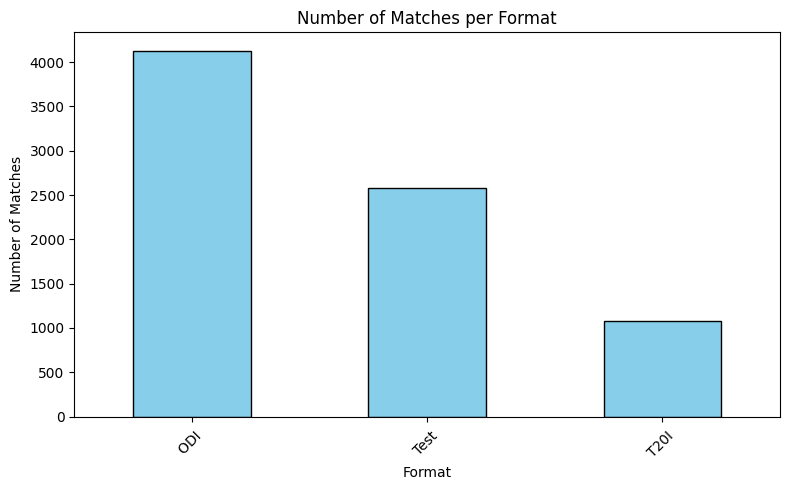

In [71]:
format_counts = cricket['Format'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 5))
format_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Matches per Format')
plt.xlabel('Format')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

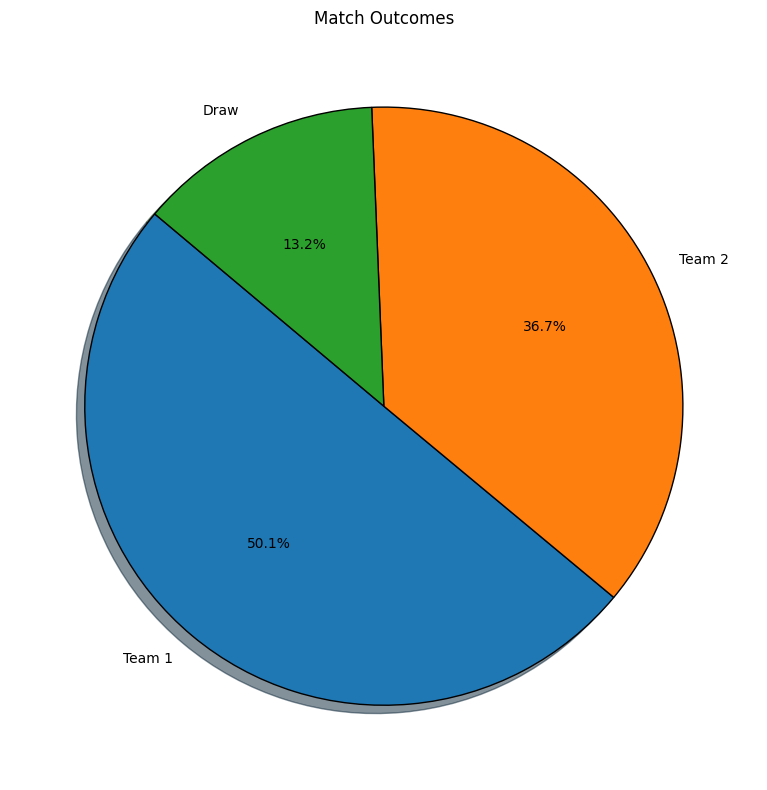

In [72]:
plt.figure(figsize=(8, 8))
cricket['Match Outcome'].value_counts().plot(
    kind='pie', 
    autopct='%1.1f%%', 
    startangle=140, 
    shadow=True, 
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Match Outcomes')
plt.ylabel('')  # Hide default y-label for pie
plt.tight_layout()
plt.show()

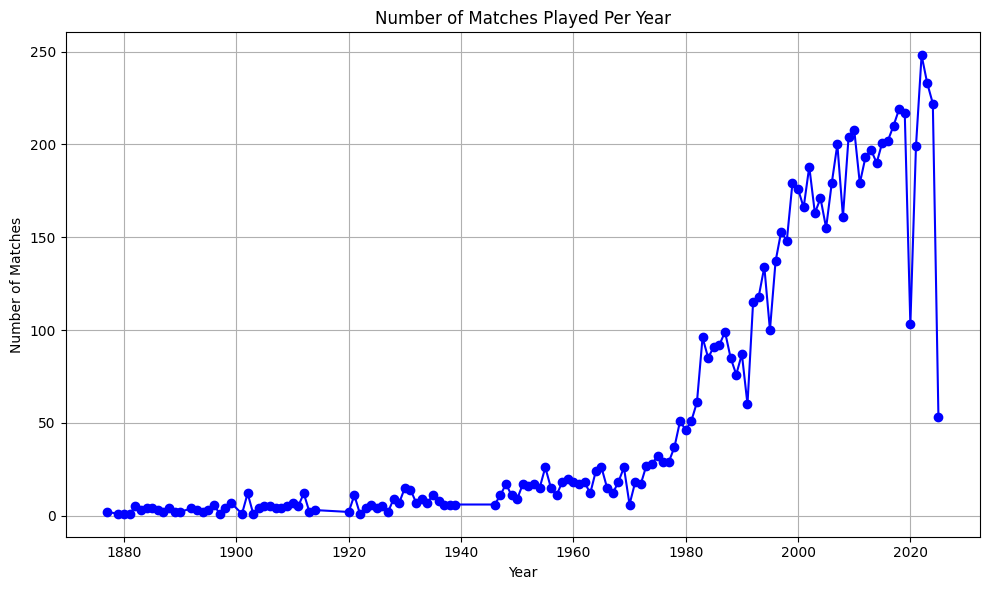

In [73]:
matches_per_year = cricket['Match Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(matches_per_year.index, matches_per_year.values, marker='o', linestyle='-', color='blue')
plt.title('Number of Matches Played Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.grid(True)
plt.tight_layout()
plt.show()

In [75]:
from sklearn.neural_network import MLPClassifier
models = {
    "KNN": KNeighborsClassifier(),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42),
    "Perceptron": Perceptron(max_iter=300, random_state=42)
}

# Evaluate again as i did not store accuracies first time
accuracies = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

KNN Accuracy: 0.5427
MLP Accuracy: 0.5555
Perceptron Accuracy: 0.5042


C:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


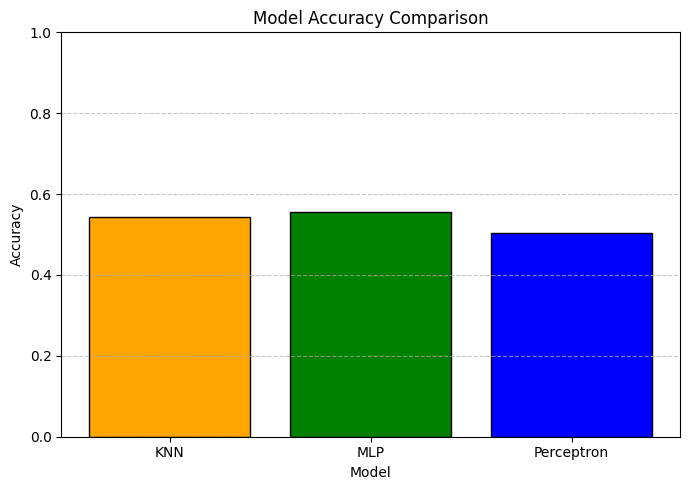

In [76]:
plt.figure(figsize=(7, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['orange', 'green', 'blue'], edgecolor='black')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## A*

In [85]:
def avg_opp_count(node, goal, pos=None):
    node_opp = set(G.neighbors(node))
    goal_opp = set(G.neighbors(goal))
    
    return 100 - (len(node_opp) + len(goal_opp)) / 2

In [86]:
def aStar(graph, start, goal, heuristic):
    visited = set()
    pri_queue = queue.PriorityQueue()  # Priority queue
    pri_queue.put((0 + heuristic[start], [start]))  # Initial state: f = g + h = 0 + heuristic

    while not pri_queue.empty():
        f, current_path = pri_queue.get()
        current_node = current_path[-1]

        if current_node == goal:
            return current_path  # Goal found

        visited.add(current_node)

        for neighbor in graph.neighbors(current_node):
            if neighbor not in visited:
                g = graph[current_node][neighbor]['weight']  # Cost from start to current node
                new_path = current_path + [neighbor]
                pri_queue.put((g + heuristic[neighbor], new_path))

    return []

In [88]:
import networkx as nx

team_pairs = cricket.apply(lambda row: tuple(sorted([row['Team 1'], row['Team 2']])), axis=1)
match_counts = team_pairs.value_counts().reset_index()
match_counts.columns = ['Team Pair', 'Match Count']

G = nx.Graph()
for (team1, team2), count in zip(match_counts['Team Pair'], match_counts['Match Count']):
    weight = max(1, 100 - count)  # avoid zero or negative weights
    G.add_edge(team1, team2, weight=weight)

In [91]:
team1 = input(print("Enter team 1: "))
team2 = input(print("Enter team 2: "))

Enter team 1: 


None India


Enter team 2: 


None England


In [92]:
import math
import queue
start_node = team1
goal_node = team2

heuristic = {node: avg_opp_count(node, goal_node, pos={}) for node in G.nodes}

path = aStar(G, start_node, goal_node, heuristic)

if path:
    print("Path from {} to {} found: {}".format(start_node, goal_node, ' -> '.join(path)))
else:
    print("No path found from {} to {}".format(start_node, goal_node))

Path from India to England found: India -> Australia -> England
